**Covid XRAY Classification**

For now, we will consider Normal images and Covid images from dataset.<br>
i.e., we will classify whether a person is having COVID or not based on X-Ray images

In [1]:
import os

In [2]:
os.listdir('COVID-19_Radiography_Dataset/COVID/')

['images', 'masks']

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

Thereofre, we have 3616 covid images

In [4]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

10192 Normal images<br>
Hence, Training data is not balanced

In [5]:
import cv2

In [6]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-100.png')

In [7]:
# Plotting image :- Matplotlib  or  cv2.imshow

import matplotlib.pyplot as plt

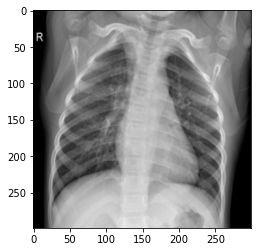

In [8]:
plt.imshow(img)

In [9]:
img.shape

(299, 299, 3)

## Loading Images

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_excel("COVID-19_Radiography_Dataset/COVID.metadata.xlsx")

In [12]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [13]:
def loadImages(path, url, target):
  images = []
  labels = []

  for i in range(len(url)):
   img_path = path + "/" + url[i]
   img = cv2.imread(img_path)     # we will get the pixel array of images

   # if dimensions of training images vary
   img = cv2.resize(img, (100,100))   

   img = img / 255.0             # normalizing the data
   images.append(img)
   labels.append(target)

  images = np.asarray(images)    # typecasting python list to numpy array
  return images, labels

In [14]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)

covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)
# 1 -> target for covid images

In [15]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normalUrl = os.listdir(normal_path)

normalImages, normalTargets = loadImages(normal_path, normalUrl, 0)
# 0 -> target for normal images

In [ ]:
# typecasting python list to numpy array
#covidImages = np.asarray(covidImages)
#normalImages = np.asarray(normalImages)

In [16]:
#shape of data
covidImages.shape  

(3616, 100, 100, 3)

In [17]:
normalImages.shape

(10192, 100, 100, 3)

In [18]:
# combining normal and covid images
data = np.r_[covidImages, normalImages]  # np.r_ :- concatenating data row wise

In [19]:
data.shape

(13808, 100, 100, 3)

In [20]:
targets = np.r_[covidTargets, normalTargets]

In [21]:
targets.shape

(13808,)

Total data -> 13,808 images<br>
out of which,
 - 10,192 normal images and
 - 3,616 covid images

<br><br>
Now, data is ready for train-test split

In [ ]:
# Normalizing images
#data = data / 255.0

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size = 0.25)

In [29]:
x_train.shape

(10356, 100, 100, 3)

## Building Model

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [36]:
model = Sequential([
    Conv2D(32, 3, input_shape = x_train[0].shape, activation='relu'),  # 32 filters, (3,3) window size
    MaxPooling2D(),          # By default :- pool_size = (2,2), strides = same as pool_size, padding = 'valid' i.e. no padding
    
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

# 3 layers of convolution and max pooling

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 16)      

We have 1600 neurons in ouu flatten layer

In [38]:
model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, batch_size = 32, epochs =5, validation_data = (x_test, y_test))

Epoch 1/5
324/324 [==============================] - 66s 199ms/step - loss: 0.3895 - accuracy: 0.8214 - val_loss: 0.3192 - val_accuracy: 0.8511
Epoch 2/5
324/324 [==============================] - 61s 187ms/step - loss: 0.2582 - accuracy: 0.8887 - val_loss: 0.2463 - val_accuracy: 0.8977
Epoch 3/5
324/324 [==============================] - 60s 186ms/step - loss: 0.2030 - accuracy: 0.9149 - val_loss: 0.2472 - val_accuracy: 0.9015
Epoch 4/5
324/324 [==============================] - 57s 176ms/step - loss: 0.1606 - accuracy: 0.9335 - val_loss: 0.1745 - val_accuracy: 0.9316
Epoch 5/5
324/324 [==============================] - 59s 182ms/step - loss: 0.1336 - accuracy: 0.9465 - val_loss: 0.1846 - val_accuracy: 0.9282


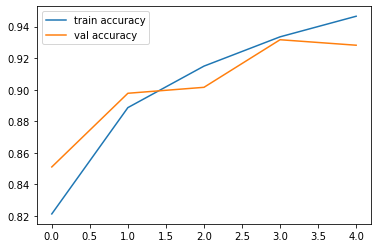

In [41]:
plt.plot(model.history.history['accuracy'], label = "train accuracy")
plt.plot(model.history.history['val_accuracy'], label = "val accuracy")
plt.legend()
plt.show()

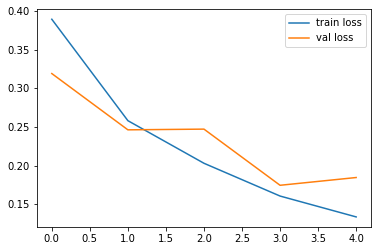

In [42]:
plt.plot(model.history.history['loss'], label = "train loss")
plt.plot(model.history.history['val_loss'], label = "val loss")
plt.legend()
plt.show()